In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = r'C:\Users\18014\Desktop\Masters\D599 - Data Preparation and Exploration\Task 2\Health Insurance Dataset.xlsx'

df_cleaned= pd.read_excel(file_path)

In [3]:
#Descriptive statistics for variables
variable_columns = ['age', 'bmi', 'sex', 'smoker']
stats = df_cleaned[variable_columns].describe(include='all')

# Display the results
print(stats)

                age          bmi   sex smoker
count   1338.000000  1338.000000  1338   1338
unique          NaN          NaN     2      2
top             NaN          NaN  male     no
freq            NaN          NaN   676   1064
mean      39.207025    30.663397   NaN    NaN
std       14.049960     6.098187   NaN    NaN
min       18.000000    15.960000   NaN    NaN
25%       27.000000    26.296250   NaN    NaN
50%       39.000000    30.400000   NaN    NaN
75%       51.000000    34.693750   NaN    NaN
max       64.000000    53.130000   NaN    NaN


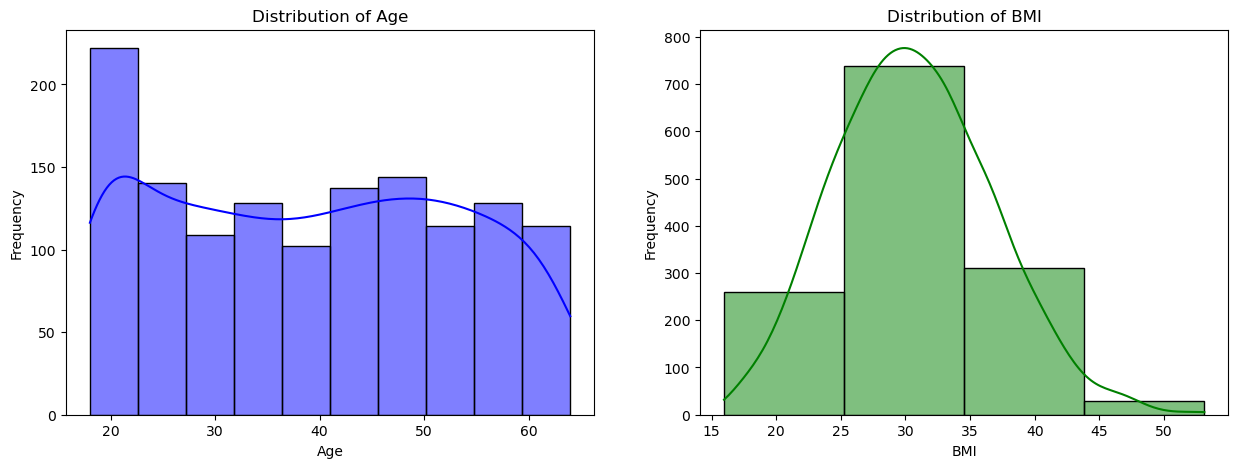

In [4]:
# Figure size for plots 15 by 5
plt.figure(figsize=(15, 5))

#Distribution of two continuous variables
#1. Age
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['age'], bins=10, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#2. Sex
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['bmi'], bins=4, kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()


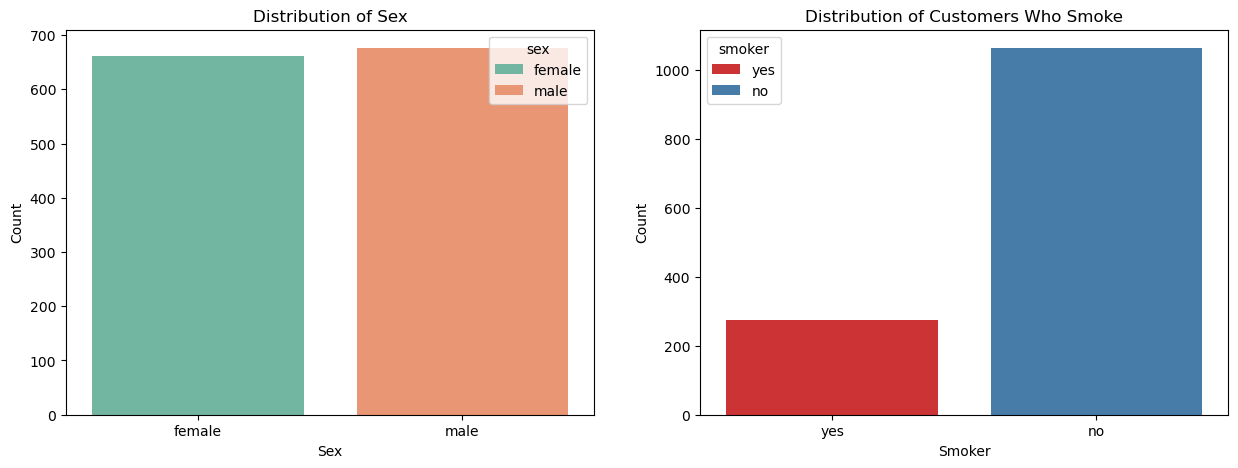

In [5]:
#Now for the catregorical variables
plt.figure(figsize=(15, 5))

#1. Sex
plt.subplot(1, 2, 1)
sns.countplot(x='sex', hue='sex', data=df_cleaned, palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

#2. BusinessTravel
plt.subplot(1, 2, 2)
sns.countplot(x='smoker', hue='smoker', data=df_cleaned, palette='Set1')
plt.title('Distribution of Customers Who Smoke')
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.show()

In [6]:
# Pearson correlation for Age and BMI
correlation = df_cleaned['age'].corr(df_cleaned['bmi'])
print("Pearson correlation between Age and BMI:", correlation)

Pearson correlation between Age and BMI: 0.10927188154853518


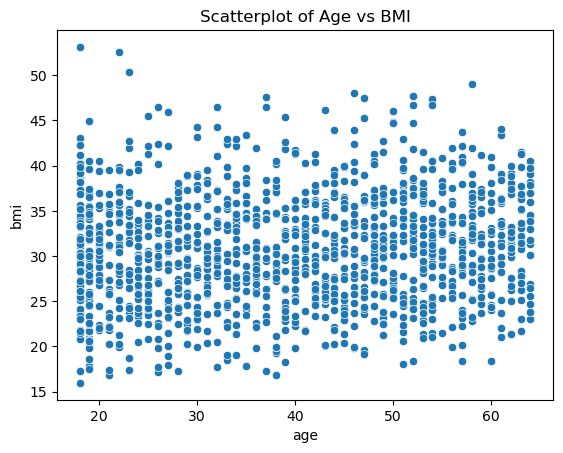

In [7]:
sns.scatterplot(x='age', y='bmi', data=df_cleaned)
plt.title('Scatterplot of Age vs BMI')
plt.show()

Text(0, 0.5, 'Age')

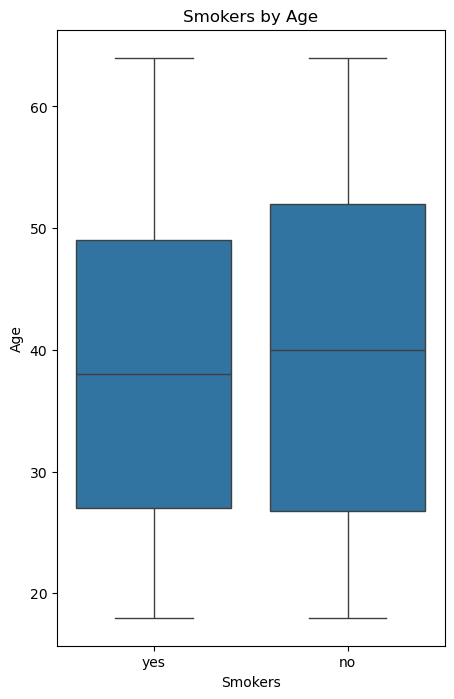

In [8]:
#Bivarate statistics on one categorical variable (Smoker) and one continuous variable (Age)
plt.figure(figsize=(5, 8))
sns.boxplot(x='smoker', y='age', data=df_cleaned)
plt.title('Smokers by Age')
plt.xlabel('Smokers')
plt.ylabel('Age')

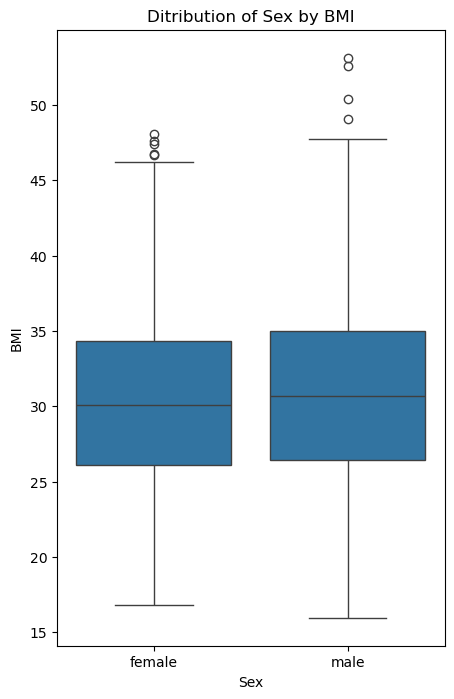

In [9]:
#Bivarate statistics on one categorical variable (Sex) and one continuous variable (BMI)
plt.figure(figsize=(5, 8))
sns.boxplot(x='sex', y='bmi', data=df_cleaned)
plt.title('Ditribution of Sex by BMI')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

In [10]:
from scipy import stats

#T-test for BMI between males and females
male_bmi = df_cleaned[df_cleaned['sex'] == 'male']['bmi']
female_bmi = df_cleaned[df_cleaned['sex'] == 'female']['bmi']

#The T-test
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi)
print(f"t_stat = {t_stat}, p_value = {p_value}")


t_stat = 1.696752635752224, p_value = 0.08997637178984932


In [11]:
#Parametric test: t-test
#Determining if BMI is a determing factor for Smoking

#First, we split the smoker column into smoking and non-smoking
smoker = df_cleaned[df_cleaned['smoker'] == 'yes']['bmi']
non_smoker = df_cleaned[df_cleaned['smoker'] == 'no']['bmi']


#Parametric t-test
t_stat, p_value = stats.ttest_ind(smoker, non_smoker)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.13708403310827058
P-value: 0.8909850280013041


In [12]:
# Check the data types of the entire DataFrame
print(df_cleaned.dtypes)

# Check the data types specifically for 'smoker' and 'charges' columns
print(df_cleaned['smoker'].dtype)
print(df_cleaned['charges'].dtype)

age            float64
sex             object
bmi            float64
children       float64
smoker          object
region          object
charges         object
Level           object
score          float64
Unnamed: 9     float64
Unnamed: 10     object
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14     object
Unnamed: 15     object
dtype: object
object
object


In [13]:
# Convert charge column to numeric as needed for the Mann-Whitney U test
df_cleaned['charges'] = pd.to_numeric(df_cleaned['charges'], errors='coerce')

In [14]:
#Non-Parametric test: Mann-Whitney U Test

#First we import the test
from scipy.stats import mannwhitneyu

#Then we split the smokers column into smokers and non-smokers
smoker = df_cleaned[df_cleaned['smoker'] == 'no']['charges']
non = df_cleaned[df_cleaned['smoker'] == 'yes']['charges']

#The Mann-Whitney U Test
stat, p_value = mannwhitneyu(smoker, non)

print('Mann-Whitney U Test Statistic:', stat)
print('P-value:', p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in Charges between smokers and non-smokers.")
else:
    print("There is no significant difference in Charges between smokers and non-smokers.")

Mann-Whitney U Test Statistic: 7403.0
P-value: 5.270233444503571e-130
There is a significant difference in Charges between smokers and non-smokers.
